In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.stack([train_images]*3, axis=-1) / 255.0
test_images = np.stack([test_images]*3, axis=-1) / 255.0

train_images = tf.image.resize(train_images, [32, 32])
test_images = tf.image.resize(test_images, [32, 32])

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

/tmp/ipython-input-3104373990.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.4405 - loss: 1.8483 - val_accuracy: 0.6052 - val_loss: 1.3008
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.6063 - loss: 1.2640 - val_accuracy: 0.6392 - val_loss: 1.1402
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.6371 - loss: 1.1357 - val_accuracy: 0.6536 - val_loss: 1.0730
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.6535 - loss: 1.0745 - val_accuracy: 0.6624 - val_loss: 1.0365
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.6552 - loss: 1.0468 - val_accuracy: 0.6668 - val_loss: 1.0148
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6554 - loss: 1.0309 - val_accuracy: 0.6685 - val_loss: 1.0006
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.6650 - loss: 1.0042 - val_accuracy: 0.6700 - val_loss: 0.9899
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6637 -

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 178s 108ms/step - accuracy: 0.2366 - loss: 10.8126 - val_accuracy: 0.1207 - val_loss: 11.0966
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 196s 104ms/step - accuracy: 0.4844 - loss: 2.4763 - val_accuracy: 0.2455 - val_loss: 2.4996
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 203s 105ms/step - accuracy: 0.6128 - loss: 1.4970 - val_accuracy: 0.6547 - val_loss: 1.1402
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 158s 105ms/step - accuracy: 0.6958 - loss: 1.0896 - val_accuracy: 0.8001 - val_loss: 0.7338
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 160s 106ms/step - accuracy: 0.7552 - loss: 0.8446 - val_accuracy: 0.8472 - val_loss: 0.5521


In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8295 - loss: 0.5853
Test loss: 0.565497636795044
Test accuracy: 0.8413000106811523


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step


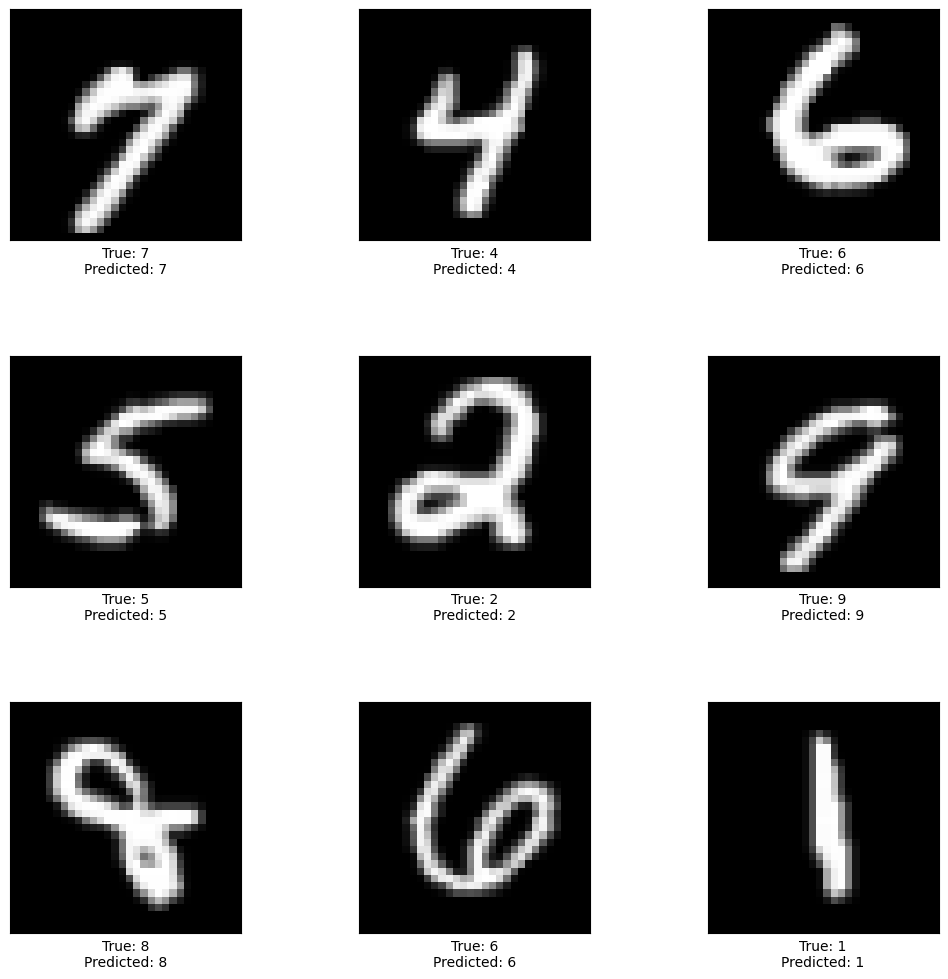

In [ ]:
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

test_images_gray = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])

random_indices = np.random.choice(len(test_images_gray), 9, replace=False)
sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]
display_sample(sample_images, sample_labels, sample_predictions)

In [ ]:
model.save("my_model.keras")
